In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.datasets import cifar10

## Import Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
y_train.shape

(50000, 1)

In [6]:
X_train.shape

(50000, 32, 32, 3)

## Data visualization

Label representation

In [7]:
labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}


dog


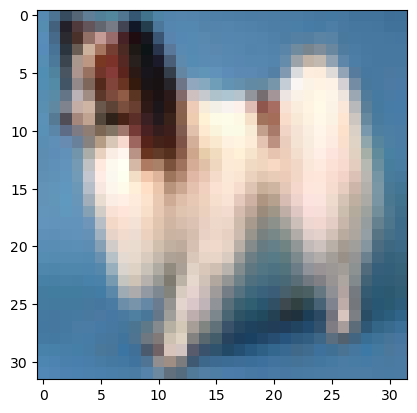

In [8]:
plt.imshow(X_train[4000])
print(labels[y_train[4000][0]])

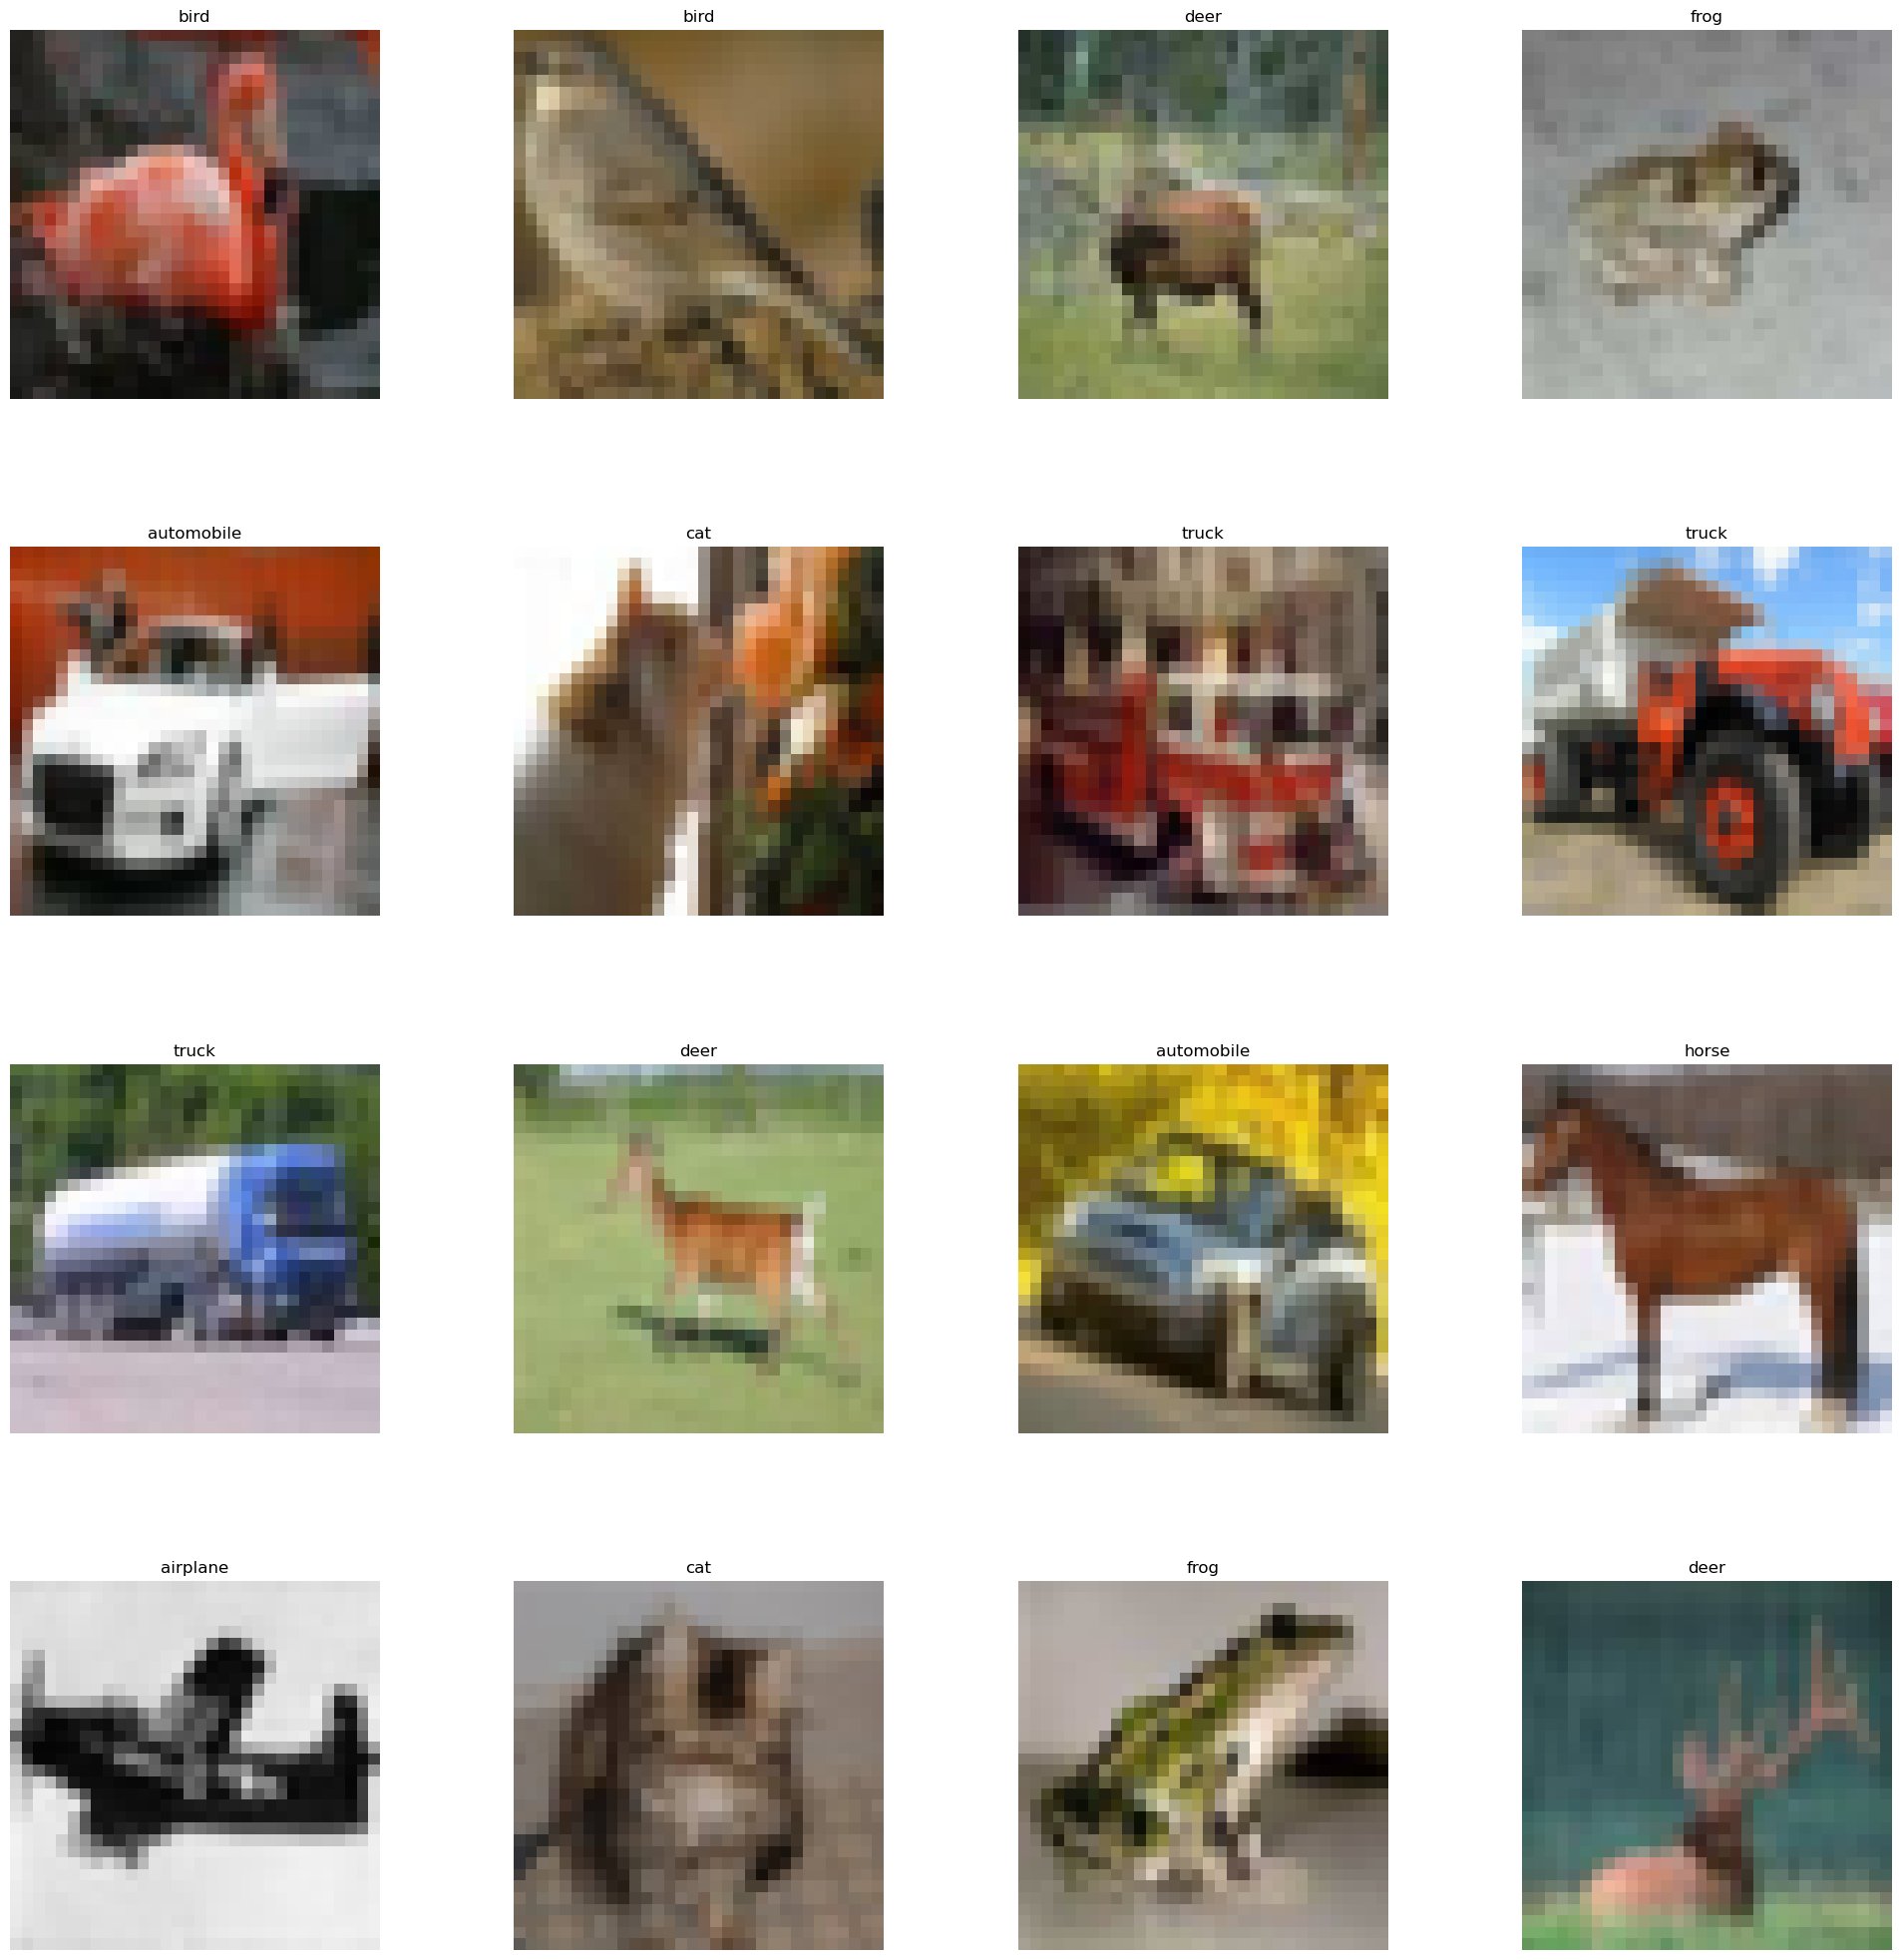

In [9]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(labels[y_train[index][0]])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

## Data Preprocessing
- Feature scaling
- Categorical data encoding

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_test

array([[[[158., 112.,  49.],
         [159., 111.,  47.],
         [165., 116.,  51.],
         ...,
         [137.,  95.,  36.],
         [126.,  91.,  36.],
         [116.,  85.,  33.]],

        [[152., 112.,  51.],
         [151., 110.,  40.],
         [159., 114.,  45.],
         ...,
         [136.,  95.,  31.],
         [125.,  91.,  32.],
         [119.,  88.,  34.]],

        [[151., 110.,  47.],
         [151., 109.,  33.],
         [158., 111.,  36.],
         ...,
         [139.,  98.,  34.],
         [130.,  95.,  34.],
         [120.,  89.,  33.]],

        ...,

        [[ 68., 124., 177.],
         [ 42., 100., 148.],
         [ 31.,  88., 137.],
         ...,
         [ 38.,  97., 146.],
         [ 13.,  64., 108.],
         [ 40.,  85., 127.]],

        [[ 61., 116., 168.],
         [ 49., 102., 148.],
         [ 35.,  85., 132.],
         ...,
         [ 26.,  82., 130.],
         [ 29.,  82., 126.],
         [ 20.,  64., 107.]],

        [[ 54., 107., 160.],
       

In [14]:
#OneHotEncode categorical data
y_train = keras.utils.to_categorical(y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test_copy = y_test
 
y_test = keras.utils.to_categorical(y_test)
y_test_copy

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [16]:
# Rescale pixel values - normalizes values to be between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [18]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

## Building the CNN Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [20]:
cnn = Sequential(
    layers= [
        Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape = [32, 32, 3]),
        Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2), strides = 2),
        Dropout(rate=0.2),
        Conv2D(filters = 128, kernel_size=(3,3), activation='relu'),
        Conv2D(filters = 128, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(rate=0.2),
        Flatten(),
        Dense(units=512, activation='relu'),
        Dense(units=512, activation='relu'),
        Dense(units=10, activation='softmax'),
    ]
)

In [21]:
cnn.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [22]:
history = cnn.fit(x = X_train, y = y_train, batch_size=500, epochs=20, shuffle=True)

Epoch 1/20


2024-08-22 18:02:22.842534: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


100/100 [==============================] - 66s 659ms/step - loss: 1.7678 - accuracy: 0.3398
Epoch 2/20
100/100 [==============================] - 66s 657ms/step - loss: 1.3204 - accuracy: 0.5206
Epoch 3/20
100/100 [==============================] - 67s 667ms/step - loss: 1.1089 - accuracy: 0.6037
Epoch 4/20
100/100 [==============================] - 70s 698ms/step - loss: 0.9545 - accuracy: 0.6620
Epoch 5/20
100/100 [==============================] - 89s 894ms/step - loss: 0.8330 - accuracy: 0.7062
Epoch 6/20
100/100 [==============================] - 83s 829ms/step - loss: 0.7343 - accuracy: 0.7422
Epoch 7/20
100/100 [==============================] - 82s 821ms/step - loss: 0.6334 - accuracy: 0.7784
Epoch 8/20
100/100 [==============================] - 84s 842ms/step - loss: 0.5645 - accuracy: 0.8018
Epoch 9/20
100/100 [==============================] - 85s 854ms/step - loss: 0.5059 - accuracy: 0.8226
Epoch 10/20
100/100 [==============================] - 90s 900ms/step - loss: 0.4278

### Evaluate model on test data

In [23]:
evaluation = cnn.evaluate(X_test, y_test)
print('Loss: {}'.format(evaluation[0]))
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 7s 20ms/step - loss: 0.9589 - accuracy: 0.7724
Loss: 0.958903431892395
Test Accuracy: 0.7724000215530396


In [24]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### Get model prediction for test data

In [25]:
y_pred = cnn.predict(X_test) 
y_pred

313/313 [==============================] - 6s 20ms/step


array([[1.19563799e-06, 1.31798861e-05, 5.51682606e-05, ...,
        3.36990684e-06, 2.70363835e-05, 3.18529828e-06],
       [1.09814464e-04, 3.30715626e-02, 6.07237427e-10, ...,
        3.07337706e-13, 9.66810763e-01, 7.86963665e-06],
       [3.02992668e-02, 1.75094919e-03, 1.02870317e-08, ...,
        5.49687051e-09, 9.67871606e-01, 7.81572890e-05],
       ...,
       [3.14942672e-14, 2.94029883e-12, 3.14859420e-07, ...,
        1.74217703e-07, 3.12222232e-12, 2.06749839e-10],
       [1.01733604e-05, 9.87451851e-01, 3.66992863e-05, ...,
        1.53558540e-05, 3.24700586e-08, 1.53468773e-05],
       [1.17532770e-17, 1.60204861e-21, 1.26896356e-15, ...,
        9.99999404e-01, 1.03079254e-19, 1.37254518e-19]], dtype=float32)

#### Identify the predicted classes

In [26]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([3, 8, 8, ..., 5, 1, 7])

## Predicting a single Image

In [27]:
from keras_preprocessing import image

test_image = image.load_img('single_prediction/img3.jpg', target_size=(32, 32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = cnn.predict(test_image)
result = np.argmax(result, axis=1)
print("Prediction: {}".format(labels[result[0]]))

1/1 [==============================] - 0s 14ms/step
Prediction: bird


### Visualize some predictions

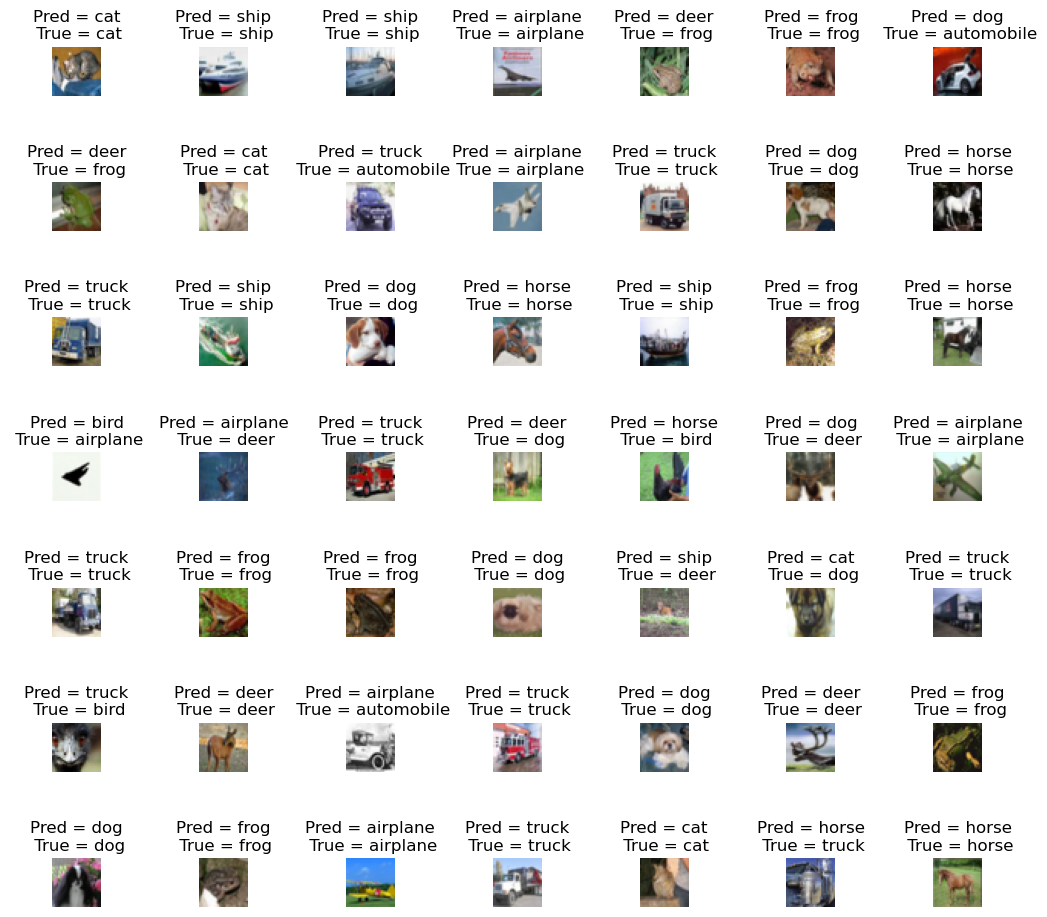

In [28]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Pred = {}\n True = {}'.format(labels[y_pred_classes[i]], labels[y_test_copy[i][0]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 2)    

### Evaluate Model

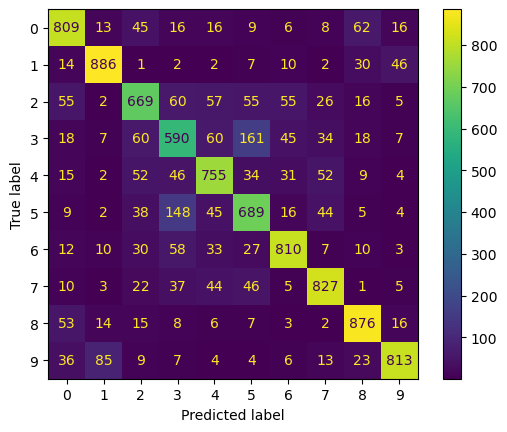

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

cm = confusion_matrix(y_test_copy, y_pred_classes)
ConfusionMatrixDisplay(cm).plot()

## Save the model

In [30]:
import os
directory = os.path.join(os.getcwd(), 'saved_models') # directory to save model in

if not os.path.isdir(directory): # checks if directory exists, if not it creates it
    os.makedirs(directory)
    
model_path = os.path.join(directory, 'cifar10_trained_model.h5')
cnn.save(model_path)